# Auricular shape analysis - age prediction

In [1]:
%load_ext autoreload
%autoreload 2

import logging
import os
import time
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
sys.path.append("../..")

from projects.auricular.curvaturedescriptors import CurvatureDescriptorsParams
from projects.auricular.curvaturedescriptors import CurvatureDescriptors
from projects.auricular.curvaturedescriptors import HistogramDescriptors
from projects.auricular.analyze import ModelAnalysis
from projects.auricular.common import getSample

In [3]:
input_data = os.path.expanduser("~/data/aurikularni_plocha_ply5/")
sample = list(getSample(input_data))
params = CurvatureDescriptorsParams(
    input_data=input_data,
    sampling_method='regular',
    dist=1.0,
    sampling_rate=0.5,
    sample_count=5000,
    output='../../../output_812')
cd = CurvatureDescriptors(params)

In [4]:
data = cd.getData()
hist_descriptors = {
    0.5: HistogramDescriptors(data, 0.5),
    1.0: HistogramDescriptors(data, 1.0),
    2.0: HistogramDescriptors(data, 2.0)
}

## Prediction

### age x mean dne

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

from projects.auricular.analyze import evaluateAllModels, ModelAnalysis

In [6]:
df = pd.DataFrame(data=[[
                    float(data1['age']),
                    np.log(float(data1['age'])),
                    float(data1['dist'][1.0]['sampled_dne'])] for data1 in data],
                  columns = ['age', 'logAge', 'dne'])

r = evaluateAllModels(df, indeps=[['dne']], dep=['logAge'], model=SVR())
pd.DataFrame(r)

Evaluating: ['logAge'] ~ ['dne']


,pvalue,rmse,bias,inaccuracy,indep,subset
0,0,16.147024,7.606958e-01,13.326758,[dne],all
1,0,18.948460,-5.600337e-15,15.990033,[mean],all
2,0,26.612774,9.499993e-01,21.811334,[random],all


### age x vector dne

In [ ]:
pd.DataFrame(hist_descriptors[0.5].getSampleHistogramData(3)[0]).plot.bar()
pd.DataFrame(hist_descriptors[0.5].getSampleHistogramData(3)[249]).plot.bar()
pd.DataFrame(hist_descriptors[0.5].getSampleHistogramData(3)[498]).plot.bar();

In [9]:
ma=ModelAnalysis(data, hist_descriptors, 'dist_curv')

In [ ]:
ma.twoParamPlot(1.0)

In [ ]:
ma.modelForBins(3, None, 1.0, model=SVR(), normalize_dist=False)

In [ ]:
ma.modelForBins(3, [[0, 2]], 1.0)

In [ ]:
ma.modelForBins(3, [[0, 1]], 1.0)

In [ ]:
ma.plotRmsePerBins(list(ma.binsRmse(2.0)))

Evaluating: ['logAge'] ~ [0, 1]
Evaluating: ['logAge'] ~ [0, 1, 2]
Evaluating: ['logAge'] ~ [0, 1, 2, 3]
Evaluating: ['logAge'] ~ [0, 1, 2, 3, 4]
Evaluating: ['logAge'] ~ [0, 1, 2, 3, 4, 5]
Evaluating: ['logAge'] ~ [0, 1, 2, 3, 4, 5, 6]
Evaluating: ['logAge'] ~ [0, 1, 2, 3, 4, 5, 6, 7]
Evaluating: ['logAge'] ~ [0, 1, 2, 3, 4, 5, 6, 7, 8]
Evaluating: ['logAge'] ~ [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Evaluating: ['logAge'] ~ [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Evaluating: ['logAge'] ~ [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Evaluating: ['logAge'] ~ [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Evaluating: ['logAge'] ~ [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Evaluating: ['logAge'] ~ [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Evaluating: ['logAge'] ~ [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Evaluating: ['logAge'] ~ [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Evaluating: ['logAge'] ~ [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
Evaluating: 

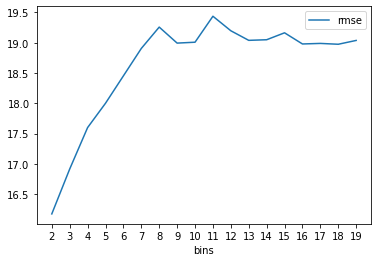

In [99]:
ma.plotRmsePerBins(list(ma.binsRmse(1.0, model=SVR())))

In [ ]:
ma.plotRmsePerBins(list(ma.binsRmse(model=LinearSVR())))

In [ ]:
ma.compareMethods(2.0)

Evaluating: ['logAge'] ~ [0, 1]
Evaluating: ['logAge'] ~ [0, 1, 2]
Evaluating: ['logAge'] ~ [0, 1, 2, 3]
Evaluating: ['logAge'] ~ [0, 1, 2, 3, 4]
Evaluating: ['logAge'] ~ [0, 1, 2, 3, 4, 5]
Evaluating: ['logAge'] ~ [0, 1, 2, 3, 4, 5, 6]
Evaluating: ['logAge'] ~ [0, 1, 2, 3, 4, 5, 6, 7]
Evaluating: ['logAge'] ~ [0, 1, 2, 3, 4, 5, 6, 7, 8]
Evaluating: ['logAge'] ~ [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Evaluating: ['logAge'] ~ [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Evaluating: ['logAge'] ~ [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Evaluating: ['logAge'] ~ [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Evaluating: ['logAge'] ~ [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Evaluating: ['logAge'] ~ [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Evaluating: ['logAge'] ~ [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Evaluating: ['logAge'] ~ [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Evaluating: ['logAge'] ~ [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
Evaluating: 

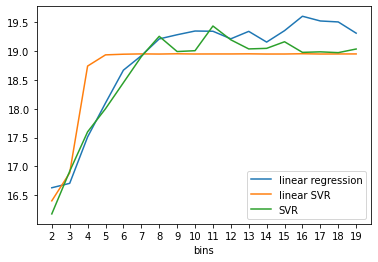

In [98]:
ma.compareMethods(1.0)

In [ ]:
ma.compareMethods(0.5)

## Neural network

In [7]:
from tensorflow import keras
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

from projects.auricular.ann import buildModel, evaluateModel

In [10]:
dist=1.0
bins=10

Y = pd.DataFrame([np.log(float(data1['age'])) for data1 in data]).values
X = pd.DataFrame(ma.hist_descriptors[dist].getSampleHistogram2dData(bins, True, False)).values
#X = pd.DataFrame(hist_descriptors[dist].getSampleHistogramData(bins)).values

In [11]:
root_logdir = os.path.join(os.curdir, "mylogs")
run_logdir = os.path.join(root_logdir, time.strftime("run_%Y_%m_%d_%H_%M_%S"))

In [13]:
X_train, X_validate_test, y_train, y_validate_test = train_test_split(X, Y,
                                                                      test_size=0.2,
                                                                      random_state=None)
X_validate, X_test, y_validate, y_test = train_test_split(X_validate_test,
                                                          y_validate_test,
                                                          test_size=0.5,
                                                          random_state=None)

model = buildModel(n_inputs=X_train.shape[1],
                   n_hidden_layers=2,
                   n_neurons=X_train.shape[1],
                   learning_rate=0.00005)
model.fit(X_train, y_train,
          use_multiprocessing=True,
          workers=8,
          epochs=1000,
          batch_size=10,
          callbacks=[keras.callbacks.EarlyStopping(patience=100),
                     keras.callbacks.TensorBoard(run_logdir)],
          validation_data=(X_test, y_test))

Epoch 1/1000
65/65 [==============================] - 1s 5ms/step - loss: 14.8503 - val_loss: 14.2992
Epoch 2/1000
65/65 [==============================] - 0s 1ms/step - loss: 13.9479 - val_loss: 13.3481
Epoch 3/1000
65/65 [==============================] - 0s 1ms/step - loss: 12.9303 - val_loss: 12.2502
Epoch 4/1000
65/65 [==============================] - 0s 1ms/step - loss: 11.7361 - val_loss: 10.9515
Epoch 5/1000
65/65 [==============================] - 0s 1ms/step - loss: 10.3085 - val_loss: 9.3865
Epoch 6/1000
65/65 [==============================] - 0s 1ms/step - loss: 8.6402 - val_loss: 7.6410
Epoch 7/1000
65/65 [==============================] - 0s 1ms/step - loss: 6.8165 - val_loss: 5.7790
Epoch 8/1000
65/65 [==============================] - 0s 1ms/step - loss: 4.9857 - val_loss: 4.0277
Epoch 9/1000
65/65 [==============================] - 0s 1ms/step - loss: 3.3476 - val_loss: 2.5623
Epoch 10/1000
65/65 [==============================] - 0s 1ms/step - loss: 2.0461 - val_los

65/65 [==============================] - 0s 1ms/step - loss: 0.0998 - val_loss: 0.1129
Epoch 81/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0997 - val_loss: 0.1127
Epoch 82/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0996 - val_loss: 0.1126
Epoch 83/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0993 - val_loss: 0.1126
Epoch 84/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0992 - val_loss: 0.1125
Epoch 85/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0989 - val_loss: 0.1124
Epoch 86/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0991 - val_loss: 0.1123
Epoch 87/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0988 - val_loss: 0.1122
Epoch 88/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0988 - val_loss: 0.1121
Epoch 89/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0986 - val_loss: 0.1122
Epoc

65/65 [==============================] - 0s 1ms/step - loss: 0.0924 - val_loss: 0.1078
Epoch 161/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0924 - val_loss: 0.1079
Epoch 162/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0923 - val_loss: 0.1077
Epoch 163/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0920 - val_loss: 0.1075
Epoch 164/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0922 - val_loss: 0.1076
Epoch 165/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0919 - val_loss: 0.1076
Epoch 166/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0920 - val_loss: 0.1076
Epoch 167/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0920 - val_loss: 0.1077
Epoch 168/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0920 - val_loss: 0.1076
Epoch 169/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0920 - val_loss: 0.

65/65 [==============================] - 0s 1ms/step - loss: 0.0894 - val_loss: 0.1066
Epoch 241/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0898 - val_loss: 0.1044
Epoch 242/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0894 - val_loss: 0.1045
Epoch 243/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0894 - val_loss: 0.1044
Epoch 244/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0891 - val_loss: 0.1047
Epoch 245/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0892 - val_loss: 0.1042
Epoch 246/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0890 - val_loss: 0.1041
Epoch 247/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0896 - val_loss: 0.1053
Epoch 248/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0890 - val_loss: 0.1044
Epoch 249/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0891 - val_loss: 0.

65/65 [==============================] - 0s 1ms/step - loss: 0.0877 - val_loss: 0.1041
Epoch 321/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0877 - val_loss: 0.1021
Epoch 322/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0874 - val_loss: 0.1019
Epoch 323/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0877 - val_loss: 0.1026
Epoch 324/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0875 - val_loss: 0.1019
Epoch 325/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0873 - val_loss: 0.1030
Epoch 326/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0873 - val_loss: 0.1018
Epoch 327/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0875 - val_loss: 0.1023
Epoch 328/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0876 - val_loss: 0.1020
Epoch 329/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0876 - val_loss: 0.

65/65 [==============================] - 0s 1ms/step - loss: 0.0869 - val_loss: 0.1004
Epoch 401/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0875 - val_loss: 0.1002
Epoch 402/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0863 - val_loss: 0.1004
Epoch 403/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0862 - val_loss: 0.1002
Epoch 404/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0863 - val_loss: 0.1012
Epoch 405/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0866 - val_loss: 0.1011
Epoch 406/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0862 - val_loss: 0.1016
Epoch 407/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0863 - val_loss: 0.1007
Epoch 408/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0865 - val_loss: 0.1004
Epoch 409/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0865 - val_loss: 0.

65/65 [==============================] - 0s 1ms/step - loss: 0.0863 - val_loss: 0.0993
Epoch 481/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0857 - val_loss: 0.0990
Epoch 482/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0855 - val_loss: 0.0999
Epoch 483/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0852 - val_loss: 0.0997
Epoch 484/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0849 - val_loss: 0.0993
Epoch 485/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0853 - val_loss: 0.0989
Epoch 486/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0858 - val_loss: 0.0993
Epoch 487/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0856 - val_loss: 0.0999
Epoch 488/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0850 - val_loss: 0.0989
Epoch 489/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0851 - val_loss: 0.

65/65 [==============================] - 0s 1ms/step - loss: 0.0843 - val_loss: 0.0982
Epoch 561/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0844 - val_loss: 0.0984
Epoch 562/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0848 - val_loss: 0.1000
Epoch 563/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0841 - val_loss: 0.0991
Epoch 564/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0848 - val_loss: 0.1013
Epoch 565/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0846 - val_loss: 0.0988
Epoch 566/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0840 - val_loss: 0.0983
Epoch 567/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0841 - val_loss: 0.1017
Epoch 568/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0846 - val_loss: 0.0982
Epoch 569/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0841 - val_loss: 0.

65/65 [==============================] - 0s 1ms/step - loss: 0.0831 - val_loss: 0.0993
Epoch 641/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0832 - val_loss: 0.0981
Epoch 642/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0833 - val_loss: 0.0982
Epoch 643/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0831 - val_loss: 0.0998
Epoch 644/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0836 - val_loss: 0.0988
Epoch 645/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0830 - val_loss: 0.0977
Epoch 646/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0835 - val_loss: 0.0978
Epoch 647/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0837 - val_loss: 0.0977
Epoch 648/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0842 - val_loss: 0.1003
Epoch 649/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0830 - val_loss: 0.

65/65 [==============================] - 0s 1ms/step - loss: 0.0822 - val_loss: 0.0982
Epoch 721/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0823 - val_loss: 0.0976
Epoch 722/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0823 - val_loss: 0.1010
Epoch 723/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0823 - val_loss: 0.0976
Epoch 724/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0825 - val_loss: 0.0975
Epoch 725/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0824 - val_loss: 0.0989
Epoch 726/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0819 - val_loss: 0.0975
Epoch 727/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0838 - val_loss: 0.0973
Epoch 728/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0829 - val_loss: 0.0980
Epoch 729/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0823 - val_loss: 0.

65/65 [==============================] - 0s 1ms/step - loss: 0.0816 - val_loss: 0.0989
Epoch 801/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0820 - val_loss: 0.0971
Epoch 802/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0815 - val_loss: 0.0971
Epoch 803/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0821 - val_loss: 0.0973
Epoch 804/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0813 - val_loss: 0.0978
Epoch 805/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0814 - val_loss: 0.0980
Epoch 806/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0816 - val_loss: 0.0989
Epoch 807/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0820 - val_loss: 0.0971
Epoch 808/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0826 - val_loss: 0.0978
Epoch 809/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0819 - val_loss: 0.

65/65 [==============================] - 0s 1ms/step - loss: 0.0806 - val_loss: 0.0971
Epoch 881/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0807 - val_loss: 0.0974
Epoch 882/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0806 - val_loss: 0.0972
Epoch 883/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0811 - val_loss: 0.1004
Epoch 884/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0805 - val_loss: 0.0971
Epoch 885/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0810 - val_loss: 0.0971
Epoch 886/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0808 - val_loss: 0.0994
Epoch 887/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0809 - val_loss: 0.0968
Epoch 888/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0812 - val_loss: 0.0976
Epoch 889/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0807 - val_loss: 0.

65/65 [==============================] - 0s 1ms/step - loss: 0.0801 - val_loss: 0.0969
Epoch 961/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0798 - val_loss: 0.0979
Epoch 962/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0796 - val_loss: 0.0968
Epoch 963/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0803 - val_loss: 0.0968
Epoch 964/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0803 - val_loss: 0.0968
Epoch 965/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0805 - val_loss: 0.0973
Epoch 966/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0806 - val_loss: 0.0968
Epoch 967/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0804 - val_loss: 0.0967
Epoch 968/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0803 - val_loss: 0.0967
Epoch 969/1000
65/65 [==============================] - 0s 1ms/step - loss: 0.0799 - val_loss: 0.

In [14]:
predictions = model.predict(X_test)
np.sqrt(mean_squared_error(np.exp(predictions), np.exp(y_test)))

15.759940340481622

In [15]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 1ms/step - loss: 0.0971


0.09709370881319046

In [16]:
X = pd.DataFrame(hist_descriptors[dist].getSampleHistogramData(bins)).values
result_curv = evaluateModel(X, Y)

15.501982815838593
14.950655704768991
15.49177704013593
15.45095041270067
18.123316049301433
17.194806138171213
16.199488572364196
16.26995334226439
16.278351953365203
16.454787294576295


In [17]:
X = pd.DataFrame(ma.hist_descriptors[dist].getSampleHistogram2dData(bins, True, False)).values
result_curv_dist = evaluateModel(X, Y)

15.924031004468125
14.619562355493809
13.824962192166833
14.808838540983697
13.305063343324255
15.764872729559103
12.610210684208504
12.551503727937488
14.898048785618569
12.973796073298368


In [23]:
rmse, predicted, predicted_indices = result_curv #_dist
rmse

16.19160693234869

In [22]:
r=[]
for i in range(10):
    X = pd.DataFrame(ma.hist_descriptors[dist].getSampleHistogram2dData(bins, True, False)).values
    result_curv_dist = evaluateModel(X, Y)
    rmse, predicted, predicted_indices = result_curv_dist
    r+=[rmse]
np.mean(r)

16.54184202376446
16.127725071880576
15.75150203657823
13.662841579646246
13.421435036370177
13.379556889585176
15.914756660517751
14.053738121680704
13.819117357133214
14.337929455241492
13.699536843415547
13.473071169873727
15.366817143178043
13.633983592913218
14.35541003778178
13.752678521739531
14.226764347784426
14.572058674562205
14.461617047826843
14.146065103102847
14.69009846141813
13.233551389958826
14.856309296047971
13.990749999452015
13.788257561976392
14.561934334936199
12.228210510017885
13.482692751457321
12.90060626673792
12.753410506160058
16.21523198342689
13.753648956607195
13.63987366994788
14.398003279199662
14.968089282623072
11.846122867336431
14.16296975961342
14.19748493868112
14.051633734110947
12.819602778979036
15.776878964232079
15.132397924932729
14.246343263468928
14.228256454795565
12.125368677799692
13.713694914093868
14.252187437324901
13.54356921968613
14.384394600917025
12.326196866334197
15.471391410142623
12.213654411640755
14.67490076842114
14.8

14.241585650206366

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
plt.scatter(np.exp(Y[predicted_indices.astype(int)]), np.exp(predicted))
plt.xlabel("actual")
plt.ylabel("predicted")
plt.plot([20, 100], [20, 100], color="black", linewidth=1);